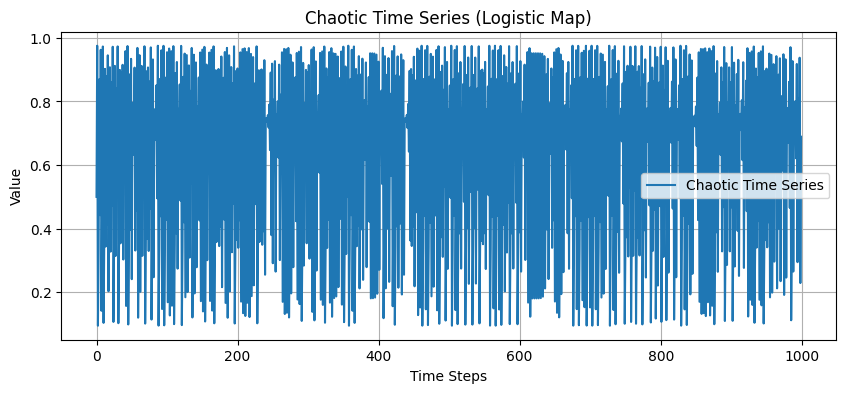

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a chaotic time series using the logistic map
def logistic_map(r, x):
    return r * x * (1 - x)

# Parameters for the logistic map
r = 3.9  # Chaotic regime parameter
n = 1000  # Number of points in the series
x0 = 0.5  # Initial value

# Generate the time series
time_series = [x0]
for _ in range(n - 1):
    x_next = logistic_map(r, time_series[-1])
    time_series.append(x_next)

# Convert to numpy array for easier manipulation
time_series = np.array(time_series)

# Plot the chaotic time series
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="Chaotic Time Series")
plt.title("Chaotic Time Series (Logistic Map)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


In [2]:
# Parameters for z-vector creation
z_vector_length = 5  # Length of each z-vector

# Function to create z-vectors from the time series
def create_z_vectors(series, length):
    z_vectors = []
    for i in range(len(series) - length + 1):
        z_vectors.append(series[i:i + length])
    return np.array(z_vectors)

# Generate z-vectors
z_vectors = create_z_vectors(time_series, z_vector_length)

# Display a few z-vectors for verification
print("First 5 z-vectors:")
print(z_vectors[:5])


First 5 z-vectors:
[[0.5        0.975      0.0950625  0.33549992 0.86946493]
 [0.975      0.0950625  0.33549992 0.86946493 0.44263311]
 [0.0950625  0.33549992 0.86946493 0.44263311 0.96216526]
 [0.33549992 0.86946493 0.44263311 0.96216526 0.14197278]
 [0.86946493 0.44263311 0.96216526 0.14197278 0.47508439]]


In [3]:
from sklearn.cluster import KMeans

# Number of clusters for KMeans
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(z_vectors)

# Assign cluster labels to each z-vector
clustered_data = list(zip(z_vectors, cluster_labels))

# Display clustering results for the first 5 z-vectors
print("First 5 z-vectors with cluster labels:")
for i in range(5):
    print(f"z-vector: {clustered_data[i][0]}, Cluster: {clustered_data[i][1]}")


First 5 z-vectors with cluster labels:
z-vector: [0.5        0.975      0.0950625  0.33549992 0.86946493], Cluster: 2
z-vector: [0.975      0.0950625  0.33549992 0.86946493 0.44263311], Cluster: 1
z-vector: [0.0950625  0.33549992 0.86946493 0.44263311 0.96216526], Cluster: 0
z-vector: [0.33549992 0.86946493 0.44263311 0.96216526 0.14197278], Cluster: 3
z-vector: [0.86946493 0.44263311 0.96216526 0.14197278 0.47508439], Cluster: 4


Last z-vector: [0.81077788 0.59832673 0.93729423 0.22921764 0.68903997]
Predicted next value: 0.7304644508767848


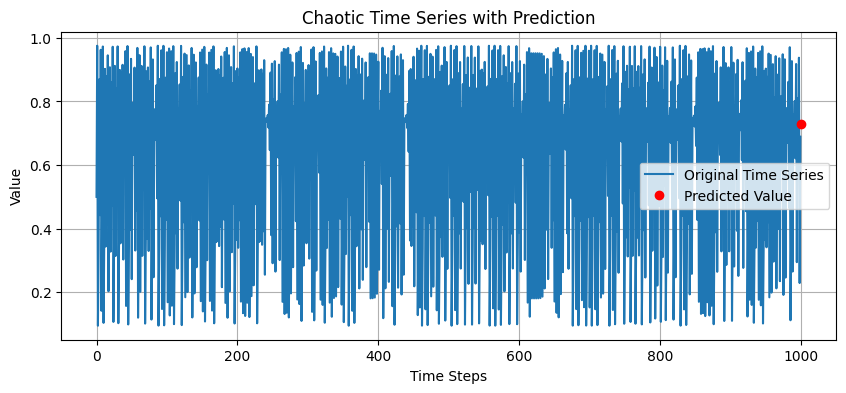

In [4]:
# Get cluster centroids from the KMeans model
centroids = kmeans.cluster_centers_

# Function to predict the next value based on the current z-vector's cluster
def predict_next_value(current_z_vector, model, centroids):
    # Find the cluster for the current z-vector
    current_cluster = model.predict([current_z_vector])[0]
    # Use the centroid of the cluster as a reference
    centroid = centroids[current_cluster]
    # The predicted next value is the last element of the centroid
    return centroid[-1]

# Predict the next value for the last z-vector in the series
last_z_vector = z_vectors[-1]
predicted_next_value = predict_next_value(last_z_vector, kmeans, centroids)

# Display the prediction
print(f"Last z-vector: {last_z_vector}")
print(f"Predicted next value: {predicted_next_value}")

# Extend the series with the predicted value for demonstration
extended_series = np.append(time_series, predicted_next_value)

# Plot the original and extended series
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(extended_series)), [predicted_next_value], 'ro', label="Predicted Value")
plt.title("Chaotic Time Series with Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


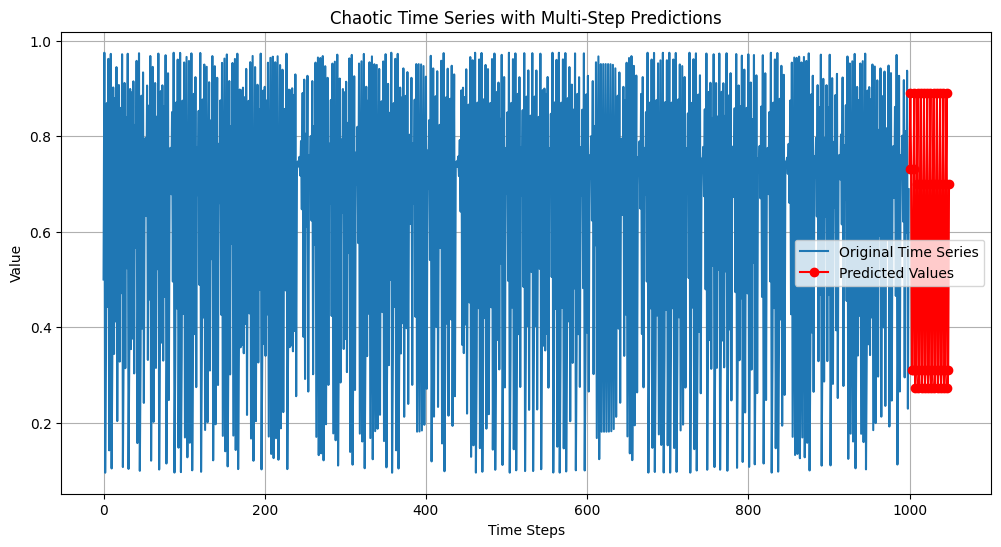

Predicted values for the next 50 steps:
[0.7304644508767848, 0.8911804431146558, 0.7304644508767848, 0.30988280983081906, 0.30988280983081906, 0.7304644508767848, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.8911804431146558, 0.27168712091412256, 0.30988280983081906, 0.7002650502130624, 0.891180443114655

In [20]:
# Function to predict multiple steps ahead
def predict_multiple_steps(initial_z_vector, steps, model, centroids):
    predictions = []
    current_z_vector = initial_z_vector.copy()

    for _ in range(steps):
        # Predict the next value
        next_value = predict_next_value(current_z_vector, model, centroids)
        predictions.append(next_value)
        # Update the z-vector (remove the first element and add the predicted value)
        current_z_vector = np.append(current_z_vector[1:], next_value)

    return predictions

# Number of steps to predict
num_steps = 50

# Predict the next 10 values
predicted_values = predict_multiple_steps(last_z_vector, num_steps, kmeans, centroids)

# Extend the series with the predicted values for visualization
extended_series = np.append(time_series, predicted_values)

# Plot the original and extended series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(extended_series)), predicted_values, 'ro-', label="Predicted Values")
plt.title("Chaotic Time Series with Multi-Step Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Display predicted values
print(f"Predicted values for the next {num_steps} steps:")
print(predicted_values)


True values for the next 50 steps:
[0.8356291676343125, 0.5356769411490844, 0.9700359078939547, 0.1133583566321925, 0.3919821344939805, 0.9294953488529417, 0.2555816067233906, 0.7420126312095147, 0.746576556706685, 0.7378800065624324, 0.7543110996636427, 0.7227708718926882, 0.7814552406810689, 0.6660534952233302, 0.8674623232240503, 0.4483886199420561, 0.9646114352492062, 0.13313123551912334, 0.4500885076282727, 0.9652844874239853, 0.13069034847413707, 0.44308048703039815, 0.9623646592688829, 0.14125379525076218, 0.47307452625426993, 0.9721725735679151, 0.10550693700398207, 0.36806337066727735, 0.907111630777247, 0.328614468334973, 0.8604452981899945, 0.4683088293496312, 0.971083111840956, 0.10951473677914134, 0.3803329109086132, 0.919151172374737, 0.28981794931784577, 0.802711671727073, 0.617626010820783, 0.9210400741557173, 0.2836284982242975, 0.7924151555553759, 0.6415241695259488, 0.8968865468159629, 0.36067616893035187, 0.8992965933746969, 0.3531926990255116, 0.8909457038842852, 0

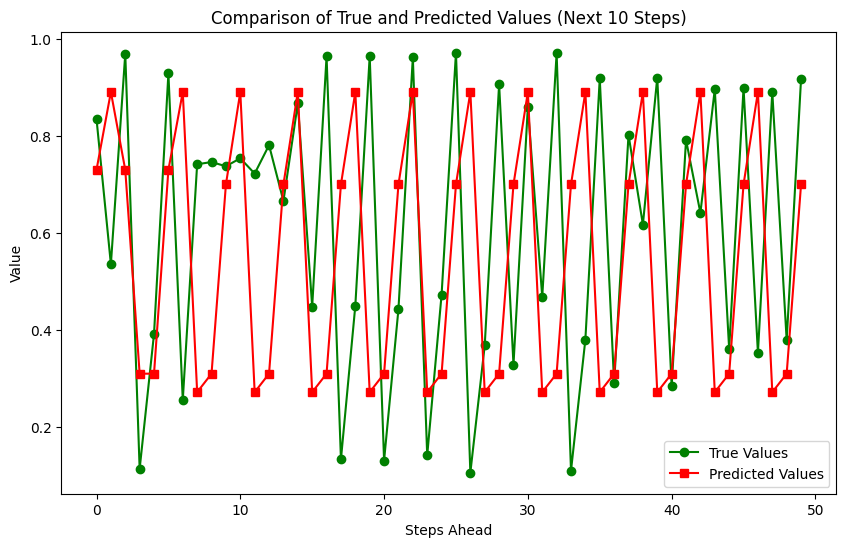

In [22]:
from sklearn.metrics import mean_squared_error

# Simulate the true values for the next 10 steps using the logistic map (ground truth)
true_values = []
current_value = time_series[-1]
for _ in range(num_steps):
    current_value = logistic_map(r, current_value)
    true_values.append(current_value)

# Calculate Mean Squared Error (MSE) between predicted and true values
mse = mean_squared_error(true_values, predicted_values)

# Display the ground truth and predicted values
print(f"True values for the next {num_steps} steps:")
print(true_values)
print(f"\nPredicted values for the next {num_steps} steps:")
print(predicted_values)
print(f"\nMean Squared Error (MSE) of predictions: {mse}")

# Plot the ground truth vs predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(true_values)), true_values, 'g-o', label="True Values")
plt.plot(range(len(predicted_values)), predicted_values, 'r-s', label="Predicted Values")
plt.title("Comparison of True and Predicted Values (Next 10 Steps)")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()


Text(0, 0.5, 'Error')

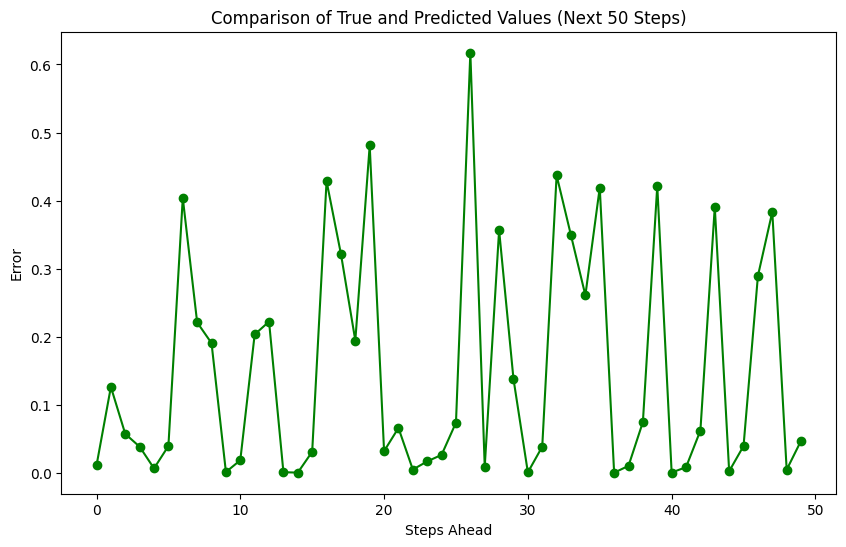

In [24]:
# Plot the ground truth vs predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(true_values)), (np.array(true_values)-np.array(predicted_values))**2, 'g-o', label="Square Error")
plt.title(f"Comparison of True and Predicted Values (Next {num_steps} Steps)")
plt.xlabel("Steps Ahead")
plt.ylabel("Error")

Использование DBSCAN для кластеризации

In [25]:
from sklearn.cluster import DBSCAN  # Импорт DBSCAN
from scipy.spatial.distance import euclidean  # Импорт функции расстояния

# Parameters for DBSCAN
eps = 0.05  # Maximum distance between points in a cluster
min_samples = 5  # Minimum number of points to form a cluster

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan_labels = dbscan.fit_predict(z_vectors)

# Extract unique cluster labels (ignoring noise labeled as -1)
unique_labels = set(dbscan_labels) - {-1}

# Compute cluster centroids (average of z-vectors in each cluster)
centroids_dbscan = {}
for label in unique_labels:
    cluster_points = z_vectors[dbscan_labels == label]
    centroids_dbscan[label] = np.mean(cluster_points, axis=0)


In [27]:
# Function to predict the next value using DBSCAN centroids
def predict_next_value_dbscan(current_z_vector, centroids):
    # Find the nearest cluster centroid
    nearest_label = None
    min_distance = float("inf")
    for label, centroid in centroids.items():
        distance = euclidean(current_z_vector, centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_label = label
    # Use the last value of the nearest centroid for prediction
    return centroids[nearest_label][-1]

# Predict multiple steps ahead using DBSCAN
def predict_multiple_steps_dbscan(initial_z_vector, steps, centroids):
    predictions = []
    current_z_vector = initial_z_vector.copy()

    for _ in range(steps):
        # Predict the next value
        next_value = predict_next_value_dbscan(current_z_vector, centroids)
        predictions.append(next_value)
        # Update the z-vector
        current_z_vector = np.append(current_z_vector[1:], next_value)

    return predictions

# Predict the next 10 values using DBSCAN
predicted_dbscan = predict_multiple_steps_dbscan(last_z_vector, num_steps, centroids_dbscan)

# Output predictions
print(f"Predicted values with DBSCAN for the next {num_steps} steps:")
print(predicted_dbscan)


Predicted values with DBSCAN for the next 50 steps:
[0.5509843983587611, 0.5754438019309811, 0.6897669492394586, 0.6418937077582785, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.47143359093206144, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.6418937077582785, 0.47143359093206144, 0.47143359093206144, 0.471

In [28]:
mse_dbscan = mean_squared_error(true_values, predicted_dbscan)
print(f"Mean Squared Error (MSE) for DBSCAN predictions: {mse_dbscan}")

Mean Squared Error (MSE) for DBSCAN predictions: 0.08929335218397866


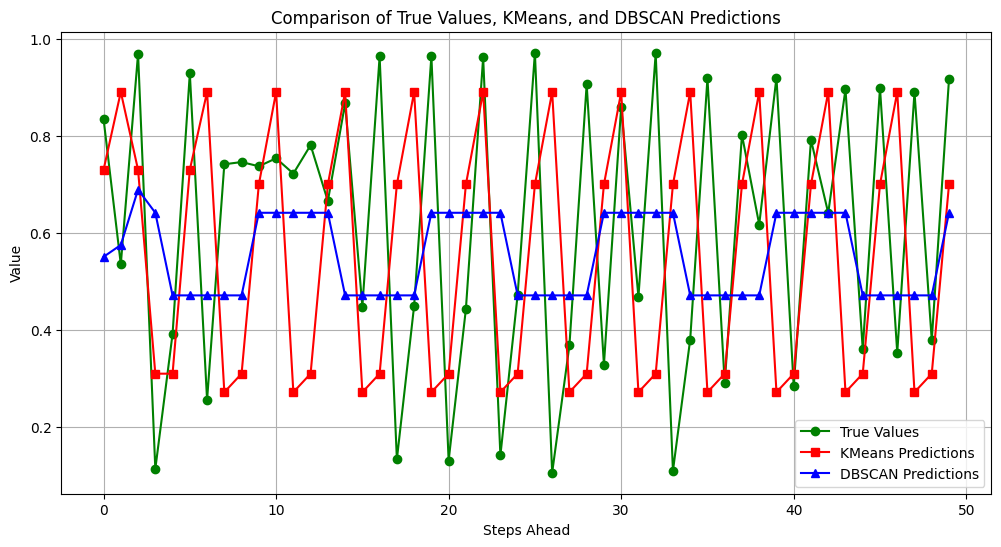

In [32]:
# Step 9: Combine and compare all predictions (KMeans and DBSCAN)

# Calculate MSE for KMeans predictions (already done earlier)
mse_kmeans = mean_squared_error(true_values, predicted_values)

# Create a combined plot for comparison
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), true_values, 'g-o', label="True Values")
plt.plot(range(len(predicted_values)), predicted_values, 'r-s', label="KMeans Predictions")
plt.plot(range(len(predicted_dbscan)), predicted_dbscan, 'b-^', label="DBSCAN Predictions")
plt.title("Comparison of True Values, KMeans, and DBSCAN Predictions")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


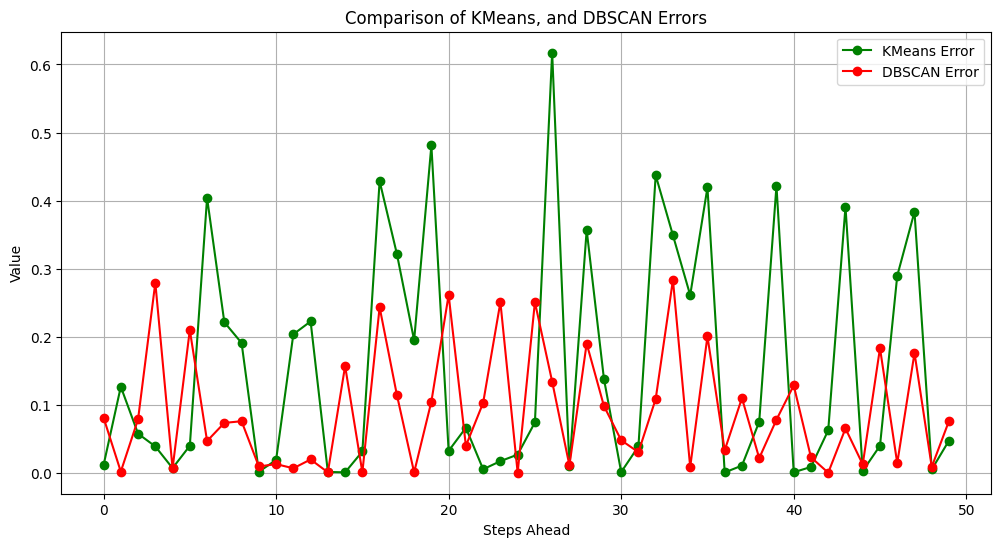

Mean Squared Error (MSE) for KMeans predictions: 0.1517165412056017
Mean Squared Error (MSE) for DBSCAN predictions: 0.08929335218397866


In [40]:
# Step 9: Combine and compare all predictions (KMeans and DBSCAN)

# Calculate MSE for KMeans predictions (already done earlier)
mse_kmeans = mean_squared_error(true_values, predicted_values)

# Create a combined plot for comparison
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), (np.array(true_values)-np.array(predicted_values))**2, 'g-o', label="KMeans Error")
plt.plot(range(len(true_values)), (np.array(true_values)-np.array(predicted_dbscan))**2, 'r-o', label="DBSCAN Error")
plt.title("Comparison of KMeans, and DBSCAN Errors")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Display all MSEs
print(f"Mean Squared Error (MSE) for KMeans predictions: {mse_kmeans}")
print(f"Mean Squared Error (MSE) for DBSCAN predictions: {mse_dbscan}")

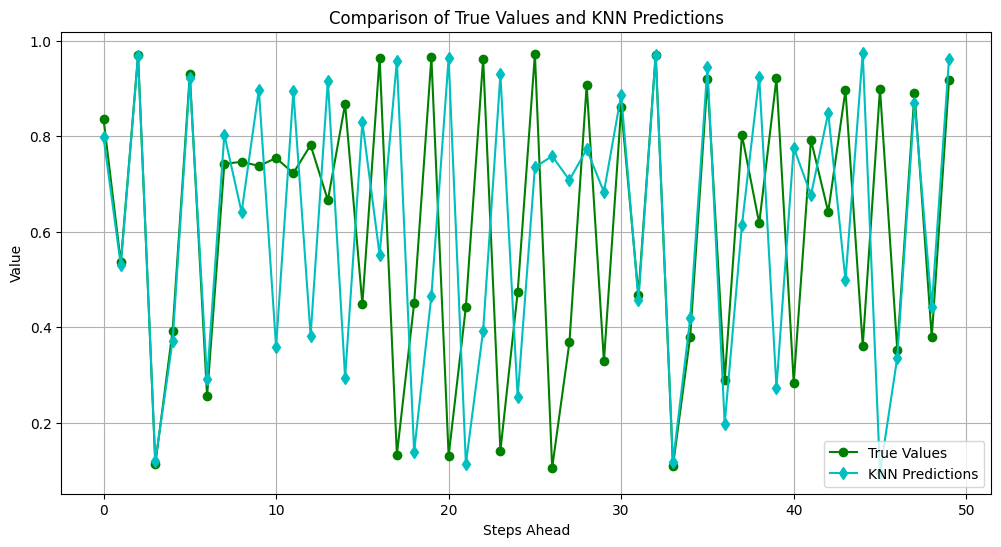

In [34]:
from sklearn.neighbors import NearestNeighbors

# Initialize and fit NearestNeighbors model
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(z_vectors)
def predict_next_value_knn(current_z_vector, knn_model, z_vectors, time_series):
    # Find indices of the nearest neighbors
    distances, indices = knn_model.kneighbors([current_z_vector])
    indices = indices[0]

    # Collect the next values for each neighbor
    next_values = []
    for idx in indices:
        if idx + len(current_z_vector) < len(time_series):  # Ensure the next value exists
            next_values.append(time_series[idx + len(current_z_vector)])

    # Predict the next value as the mean of neighbors' next values
    return np.mean(next_values) if next_values else current_z_vector[-1]  # Default to last value if no neighbors

# Predict multiple steps ahead using KNN
def predict_multiple_steps_knn(initial_z_vector, steps, knn_model, z_vectors, time_series):
    predictions = []
    current_z_vector = initial_z_vector.copy()

    for _ in range(steps):
        # Predict the next value
        next_value = predict_next_value_knn(current_z_vector, knn_model, z_vectors, time_series)
        predictions.append(next_value)
        # Update the z-vector
        current_z_vector = np.append(current_z_vector[1:], next_value)

    return predictions

# Predict the next 10 values using KNN
predicted_knn = predict_multiple_steps_knn(last_z_vector, num_steps, knn, z_vectors, time_series)

# Calculate MSE for KNN predictions
mse_knn = mean_squared_error(true_values, predicted_knn)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), true_values, 'g-o', label="True Values")
plt.plot(range(len(predicted_knn)), predicted_knn, 'c-d', label="KNN Predictions")
plt.title("Comparison of True Values and KNN Predictions")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

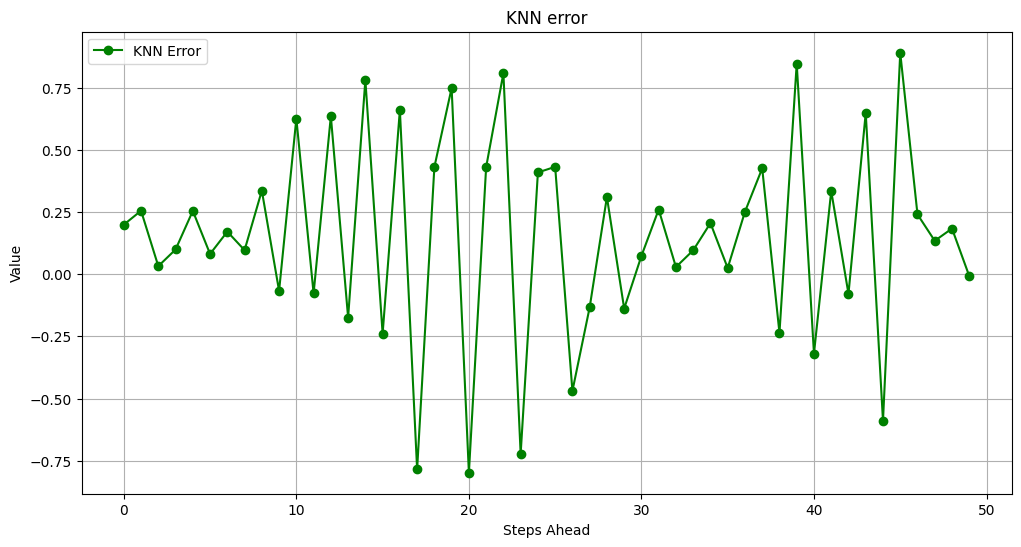

Predicted values with KNN for the next 10 steps:
[0.7979149876445422, 0.5297955528842658, 0.9684069396489495, 0.1191141824892557, 0.3710331028523057, 0.921025898299766, 0.29091507384363063, 0.8034486746030574, 0.6408617626317176, 0.8973809324504223, 0.35885716927439987, 0.8945599748802108, 0.382466690334134, 0.9167594005236094, 0.2940817342600652, 0.8294221576151092, 0.5516682882460359, 0.9581697263256447, 0.13895503316707955, 0.46577244745339635, 0.9637871758969775, 0.11385529654652493, 0.39303636027006855, 0.9293726319013608, 0.25333111638262856, 0.7353129301087759, 0.7583835731876718, 0.7082752837524503, 0.7726381078552174, 0.6832274411739009, 0.8872174295202356, 0.45657204356723097, 0.970780388523859, 0.1168780333081656, 0.4183846647863934, 0.9457698538826236, 0.1975227249370173, 0.6142814048813979, 0.9240406423734808, 0.2737200736960477, 0.7763842313819378, 0.6769528434048033, 0.8489162252127045, 0.49861268246598756, 0.9749532054873101, 0.09526889310214898, 0.3361516346867539, 0.8

In [36]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), np.array(true_values)-np.array(predicted_knn)**2, 'g-o', label="KNN Error")
plt.title("KNN error")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Output predictions and MSE
print("Predicted values with KNN for the next 10 steps:")
print(predicted_knn)
print(f"\nMean Squared Error (MSE) for KNN predictions: {mse_knn}")

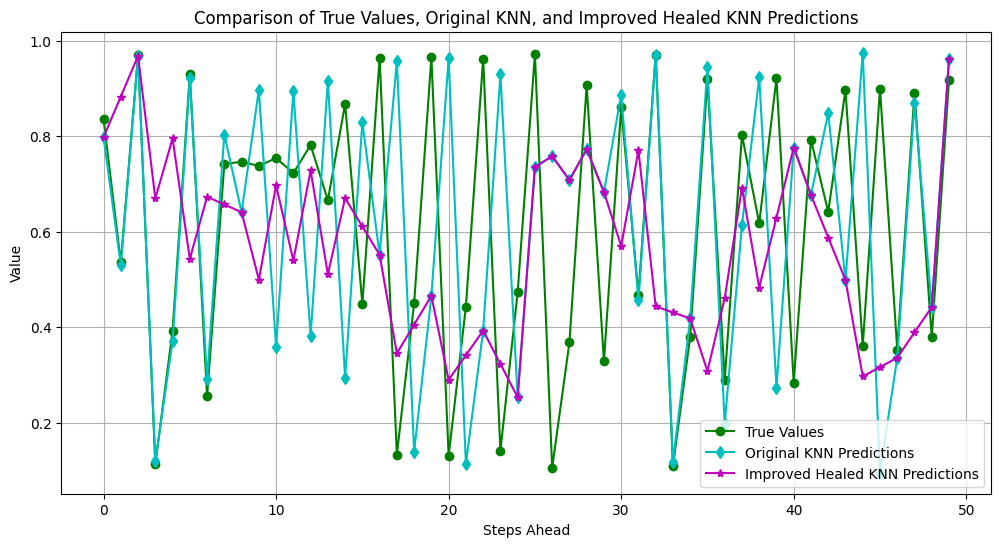

In [38]:
def healing_algorithm_improved(predictions, threshold=0.1):
    """
    Improved Healing Algorithm: Corrects only outliers in predictions.
    :param predictions: List of predicted values.
    :param threshold: Threshold for detecting outliers (difference from neighbors).
    :return: Corrected predictions.
    """
    healed_predictions = predictions.copy()
    for i in range(1, len(predictions) - 1):
        # Calculate the difference with neighboring values
        diff_prev = abs(healed_predictions[i] - healed_predictions[i - 1])
        diff_next = abs(healed_predictions[i] - healed_predictions[i + 1])

        # If the value is significantly different from neighbors, correct it
        if diff_prev > threshold and diff_next > threshold:
            healed_predictions[i] = (healed_predictions[i - 1] + healed_predictions[i + 1]) / 2

    return healed_predictions

# Apply improved healing algorithm to KNN predictions
healed_knn_predictions_improved = healing_algorithm_improved(predicted_knn)

# Calculate MSE for improved healed predictions
mse_healed_knn_improved = mean_squared_error(true_values, healed_knn_predictions_improved)

# Plot improved healed predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), true_values, 'g-o', label="True Values")
plt.plot(range(len(predicted_knn)), predicted_knn, 'c-d', label="Original KNN Predictions")
plt.plot(range(len(healed_knn_predictions_improved)), healed_knn_predictions_improved, 'm-*', label="Improved Healed KNN Predictions")
plt.title("Comparison of True Values, Original KNN, and Improved Healed KNN Predictions")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


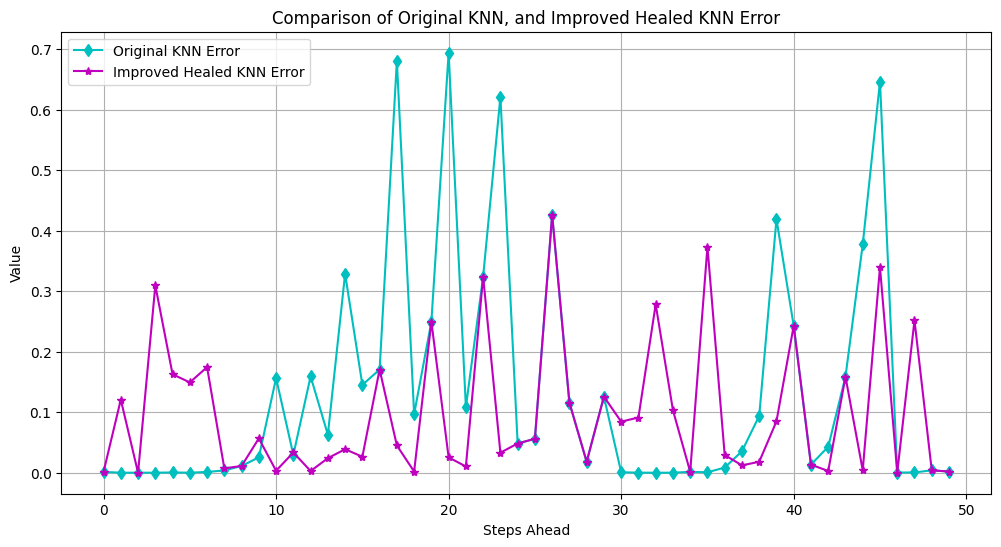

Improved Healed KNN predictions for the next 10 steps:
[0.7979149876445422, 0.8831609636467459, 0.9684069396489495, 0.6697200212506276, 0.7953729597751968, 0.5431440168094137, 0.6732963457062355, 0.6570790541689766, 0.6408617626317176, 0.49985946595305875, 0.6972097204166348, 0.5398382053753844, 0.7282988029494969, 0.511190268604781, 0.6703062131099451, 0.6109872506779905, 0.5516682882460359, 0.3453116607065577, 0.405542054079977, 0.46577244745339635, 0.28981387199996067, 0.3414251161350146, 0.39303636027006855, 0.32318373832634856, 0.25333111638262856, 0.7353129301087759, 0.7583835731876718, 0.7082752837524503, 0.7726381078552174, 0.6832274411739009, 0.569899742370566, 0.7703400654472125, 0.443609049377689, 0.4309968570820412, 0.4183846647863934, 0.3079536948617054, 0.4611175498715516, 0.6925790961225162, 0.48314958490928195, 0.6297669081456099, 0.7763842313819378, 0.6769528434048033, 0.5877827629353954, 0.49861268246598756, 0.2969407877840683, 0.3165462112354111, 0.3361516346867539, 

In [39]:

# Plot improved healed predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), (np.array(true_values) - np.array(predicted_knn))**2, 'c-d', label="Original KNN Error")
plt.plot(range(len(true_values)), (np.array(true_values) - np.array(healed_knn_predictions_improved))**2, 'm-*', label="Improved Healed KNN Error")
plt.title("Comparison of Original KNN, and Improved Healed KNN Error")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Output improved healed predictions and MSE
print("Improved Healed KNN predictions for the next 10 steps:")
print(healed_knn_predictions_improved)
print(f"\nMean Squared Error (MSE) for improved healed KNN predictions: {mse_healed_knn_improved}")

In [13]:
!pip install dtaidistance

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


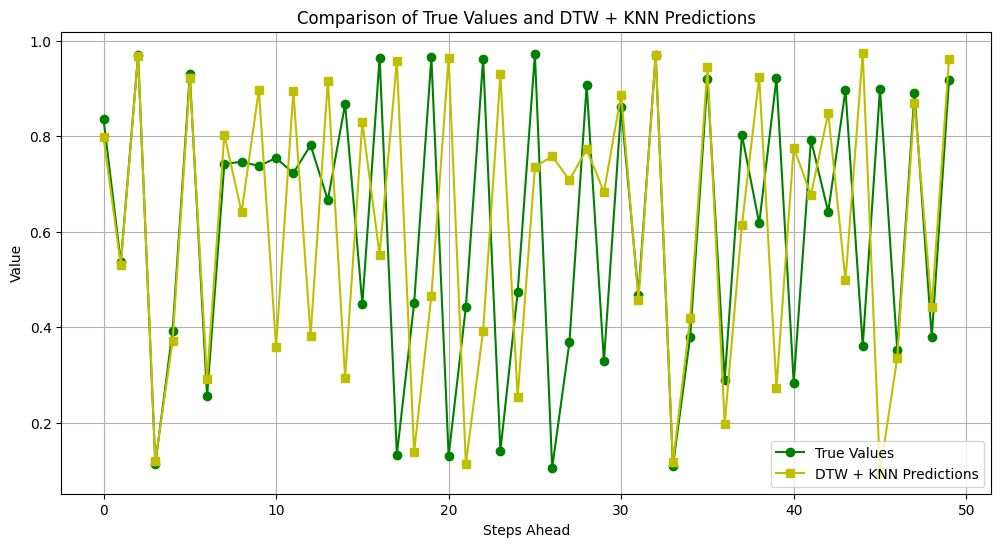

In [42]:
from dtaidistance import dtw

# Step 12: Predict using Dynamic Time Warping (DTW) + KNN

# Function to calculate DTW distance between a vector and all z-vectors
def calculate_dtw_distances(current_z_vector, z_vectors):
    distances = []
    for z_vector in z_vectors:
        distances.append(dtw.distance(current_z_vector, z_vector))
    return np.array(distances)

# Function to predict the next value using DTW + KNN
def predict_next_value_dtw_knn(current_z_vector, z_vectors, time_series, k=3):
    # Calculate DTW distances
    distances = calculate_dtw_distances(current_z_vector, z_vectors)
    # Find the indices of the k nearest neighbors
    nearest_indices = np.argsort(distances)[:k]
    # Collect the next values for each neighbor
    next_values = []
    for idx in nearest_indices:
        if idx + len(current_z_vector) < len(time_series):  # Ensure the next value exists
            next_values.append(time_series[idx + len(current_z_vector)])
    # Predict the next value as the mean of neighbors' next values
    return np.mean(next_values) if next_values else current_z_vector[-1]  # Default to last value if no neighbors

# Predict multiple steps ahead using DTW + KNN
def predict_multiple_steps_dtw_knn(initial_z_vector, steps, z_vectors, time_series, k=3):
    predictions = []
    current_z_vector = initial_z_vector.copy()

    for _ in range(steps):
        # Predict the next value
        next_value = predict_next_value_dtw_knn(current_z_vector, z_vectors, time_series, k)
        predictions.append(next_value)
        # Update the z-vector
        current_z_vector = np.append(current_z_vector[1:], next_value)

    return predictions

# Predict the next 10 values using DTW + KNN
predicted_dtw_knn = predict_multiple_steps_dtw_knn(last_z_vector, num_steps, z_vectors, time_series)

# Calculate MSE for DTW + KNN predictions
mse_dtw_knn = mean_squared_error(true_values, predicted_dtw_knn)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), true_values, 'g-o', label="True Values")
plt.plot(range(len(predicted_dtw_knn)), predicted_dtw_knn, 'y-s', label="DTW + KNN Predictions")
plt.title("Comparison of True Values and DTW + KNN Predictions")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


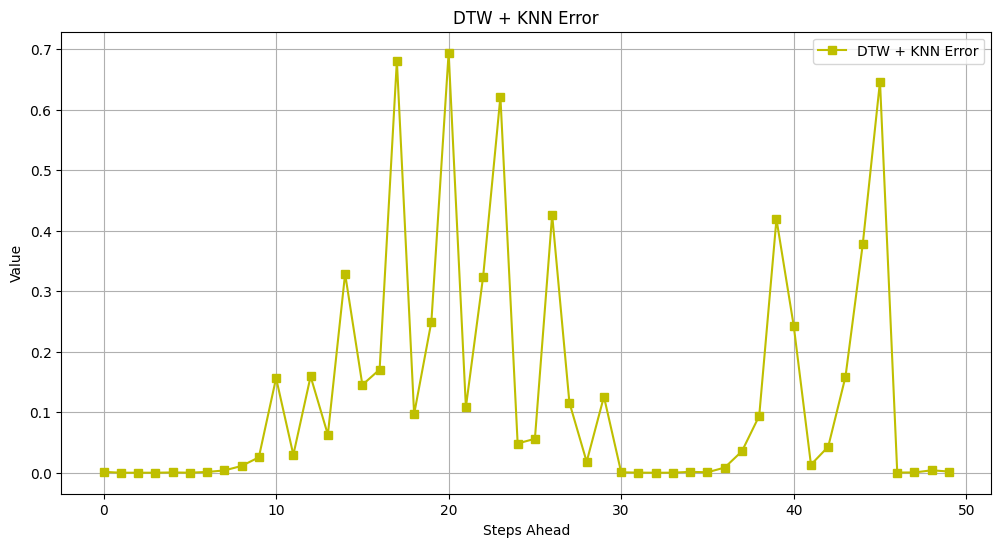

Predicted values with DTW + KNN for the next 10 steps:
[0.7979149876445422, 0.5297955528842658, 0.9684069396489495, 0.1191141824892557, 0.3710331028523057, 0.921025898299766, 0.29091507384363063, 0.8034486746030574, 0.6408617626317176, 0.8973809324504223, 0.35885716927439987, 0.8945599748802108, 0.382466690334134, 0.9167594005236094, 0.2940817342600652, 0.8294221576151092, 0.5516682882460359, 0.9581697263256447, 0.13895503316707955, 0.46577244745339635, 0.9637871758969775, 0.11385529654652493, 0.39303636027006855, 0.9293726319013608, 0.25333111638262856, 0.7353129301087759, 0.7583835731876718, 0.7082752837524503, 0.7726381078552174, 0.6832274411739009, 0.8872174295202356, 0.45657204356723097, 0.970780388523859, 0.1168780333081656, 0.4183846647863934, 0.9457698538826236, 0.1975227249370173, 0.6142814048813979, 0.9240406423734808, 0.2737200736960477, 0.7763842313819378, 0.6769528434048033, 0.8489162252127045, 0.49861268246598756, 0.9749532054873101, 0.09526889310214898, 0.336151634686753

In [45]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(true_values)), (np.array(true_values) - np.array(predicted_dtw_knn))**2, 'y-s', label="DTW + KNN Error")
plt.title("DTW + KNN Error")
plt.xlabel("Steps Ahead")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Output predictions and MSE
print("Predicted values with DTW + KNN for the next 10 steps:")
print(predicted_dtw_knn)
print(f"\nMean Squared Error (MSE) for DTW + KNN predictions: {mse_dtw_knn}")
